# Take 3 at visualiztion of data as it flows through the auto-encoder

In [42]:
import torch
from torch import nn
import torchvision
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [43]:
# Create a model class and initialize the model class

class AutoEncoderCNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1),

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1)
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),

            nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),

            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
    
            nn.ConvTranspose2d(in_channels=32, out_channels=3, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model_0 = AutoEncoderCNN().to(device)

In [44]:
from torchvision import transforms
from PIL import Image
test_image = Image.open('image.jpg')

image_transform = transforms.Compose([
    transforms.Resize(size=(256, 256)),
    transforms.ToTensor()
])


image_transform_260 = transforms.Compose([
    transforms.Resize(size=(260, 260)),
    transforms.ToTensor()
])

test_image = image_transform(test_image)
test_image.shape

torch.Size([3, 256, 256])

In [45]:
# Convolution Operation

tensor = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
tensor = tensor.unsqueeze(dim=0).unsqueeze(dim=0)

custom_kernel = torch.tensor([[[[1.0, 2.0], [3.0, 4.0]]]])
print(custom_kernel)

conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2)
conv.weight.data = custom_kernel
conv.bias.data.fill_(0)

output = conv(tensor)
print(output)

tensor([[[[1., 2.],
          [3., 4.]]]])
tensor([[[[37., 47.],
          [67., 77.]]]], grad_fn=<ConvolutionBackward0>)


torch.Size([3, 256, 256])
torch.Size([3, 260, 260])


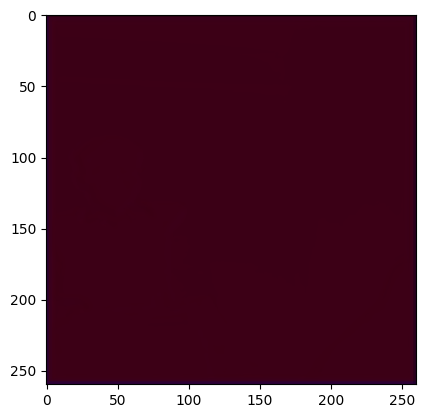

In [46]:
import matplotlib.pyplot as plt

# Test the model input and output shape
print(test_image.shape)

x = model_0(test_image.to(device))
print(x.shape)
plt.imshow(x.detach().cpu().permute(1, 2, 0))

In [47]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

In [48]:
our_image = Image.open('image.jpg')
test_image_260 = image_transform_260(our_image)

In [50]:
num_epochs = 60

for epoch in range(num_epochs):
    model_0.train()

    model_output = model_0(test_image.unsqueeze(dim=0).to(device))


    loss = criterion(model_output, test_image_260.to(device))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch Count: {epoch+1}/{num_epochs} | Loss: {loss:.4f}')

Epoch Count: 5/60 | Loss: 0.1836
Epoch Count: 10/60 | Loss: 0.1831
Epoch Count: 15/60 | Loss: 0.1827
Epoch Count: 20/60 | Loss: 0.1824
Epoch Count: 25/60 | Loss: 0.1821
Epoch Count: 30/60 | Loss: 0.1818
Epoch Count: 35/60 | Loss: 0.0799
Epoch Count: 40/60 | Loss: 0.0732
Epoch Count: 45/60 | Loss: 0.0313
Epoch Count: 50/60 | Loss: 0.0131
Epoch Count: 55/60 | Loss: 0.0108
Epoch Count: 60/60 | Loss: 0.0078


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1553621].


Text(0.5, 1.0, 'Passed thorugh auto encoder')

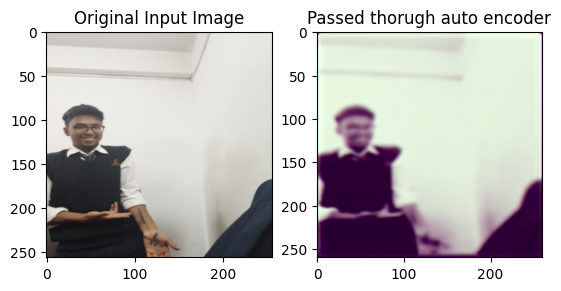

In [51]:
output = model_0(test_image.to(device))

plt.subplot(1, 2, 1)
plt.imshow(test_image.permute(1, 2, 0))
plt.title('Original Input Image')

plt.subplot(1, 2, 2)
plt.imshow(output.permute(1, 2, 0).detach().cpu())
plt.title('Passed thorugh auto encoder')

# Auto Encoder in MNIST dataset

In [52]:
# Get the MNIST Dataset
from torchvision import datasets

train_data = datasets.MNIST(root='data',
                            train=True,
                            download=True,
                            transform=torchvision.transforms.ToTensor(),
                            target_transform=None)

test_data = datasets.MNIST(root='data',
                           train=False,
                           download=True,
                           transform=torchvision.transforms.ToTensor(),
                           target_transform=None)

In [53]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [62]:
# Create a model class and initialize the model class

class AutoEncoderCNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1),

            # nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            # nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2, stride=2),

            # nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            # nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2, stride=2),

            # nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            # nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.decoder = nn.Sequential(
            # nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=3, stride=2, padding=1, output_padding=1),
            # nn.ReLU(),

            # nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1, output_padding=1),
            # nn.ReLU(),

            # nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1, output_padding=1),
            # nn.ReLU(),
    
            nn.ConvTranspose2d(in_channels=64, out_channels=1, kernel_size=3, stride=1, padding=1, output_padding=1),
            nn.ReLU()
            )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model_1 = AutoEncoderCNN().to(device)

In [63]:
for image, label in train_dataloader:
    print(image.shape)
    break

torch.Size([32, 1, 28, 28])


In [64]:
num_epochs = 1

for epoch in range(num_epochs):
    model_1.train()
    
    train_loss = 0

    for batch, (image, label) in enumerate(train_dataloader):

        image, label = image.to(device), label.to(device)

        model_output = model_1(image)

        loss = criterion(model_output, image)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 500 == 0:
            print(f'Looked through {batch+1} batches out of {len(train_dataloader)}')


    train_loss /= len(train_dataloader)

    print(f'EPOCH COUNT: {epoch} | Loss: {train_loss:.4f}')



RuntimeError: output padding must be smaller than either stride or dilation, but got output_padding_height: 1 output_padding_width: 1 stride_height: 1 stride_width: 1 dilation_height: 1 dilation_width: 1

torch.Size([1, 28, 28])


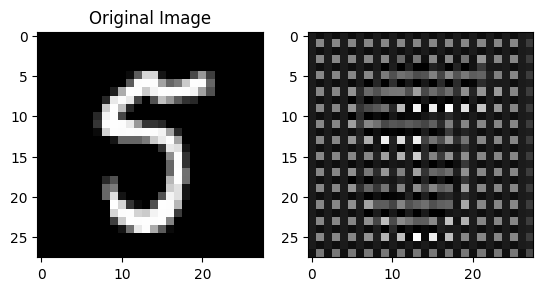

In [61]:
import random
rand_num = random.randint(1, 10000)

before = test_data[rand_num][0]
plt.subplot(1, 2, 1)
plt.imshow(before.permute(1, 2, 0), cmap='grey')
plt.title('Original Image')

plt.subplot(1, 2, 2)
print(before.shape)
x = model_1(test_data[rand_num][0].to(device))
x = x.detach().cpu().permute(1, 2, 0)
plt.imshow(x, cmap='grey')
